In [2]:
import numpy as np
import matplotlib.pyplot as plt

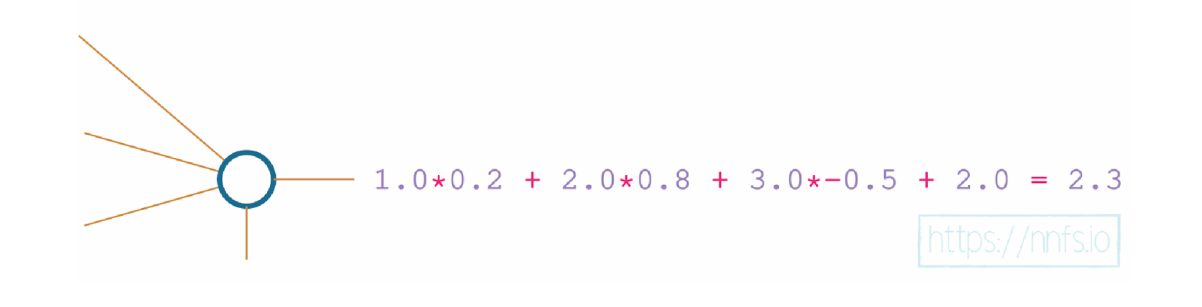

In [18]:
# a single neuron
inputs= [1, 2, 3, 2.5] # a sample
weight= [0.2, 0.8, -0.5, 1.0] # a neuron
bias= 2

neuron_output= (inputs[0] * weight[0] + 
         inputs[1] * weight[1] + 
         inputs[2] * weight[2] +
         inputs[3] * weight[3] +
         bias
        )
neuron_output

4.8

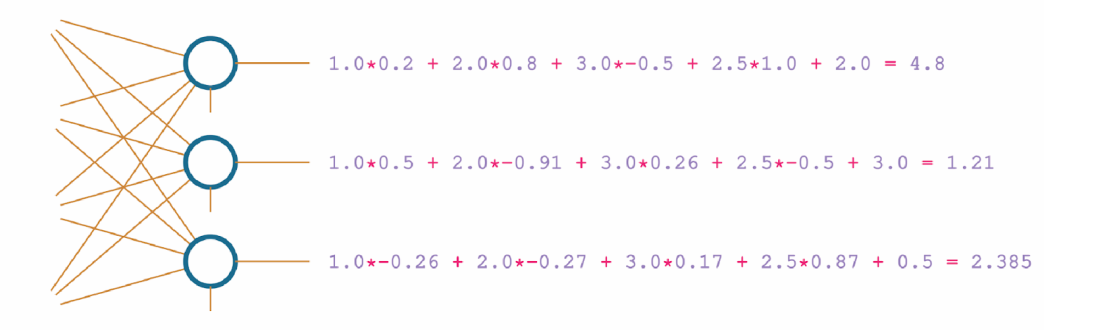

In [4]:
# a layer of neuron (3 neurons)
inputs= [1, 2, 3, 2.5] # 4 features of a sample
weights1= [0.2, 0.8, -0.5, 1.0] # neuron 1
weights2 = [0.5, -0.91, 0.26, -0.5] # neuron 2
weights3 = [-0.26, -0.27, 0.17, 0.87] # neuron 3
bias1= 2
bias2= 3
bias3= 0.5

layer_outputs= [
    inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1, 
    inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2, 
    inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3, 
]
layer_outputs

[4.8, 1.21, 2.385]

In [19]:
# a layer of neuron (3 neurons) with loops
inputs= [1, 2, 3, 2.5] # a sample
weights= [
    [0.2, 0.8, -0.5, 1.0], # weights of neuron 1
    [0.5, -0.91, 0.26, -0.5], # weights of neuron 2
    [-0.26, -0.27, 0.17, 0.87], # weights of neuron 3
]
biases= [
    2, # bias of neuron 1
    3, # bias of neuron 2
    0.5, # bias of neuron 3
]

def layer_output(inputs, weights, biases):
    layer_outputs= []
    
    for neuron_weights, neuron_bias in zip(weights, biases, strict= True):
        neuron_output= 0
    
        for input_, weight_ in zip(inputs, neuron_weights, strict= True):
            neuron_output+= input_ * weight_
    
        neuron_output+= neuron_bias
        layer_outputs.append(neuron_output)
    
    return layer_outputs

layer_output(inputs, weights, biases)

[4.8, 1.21, 2.385]

In [8]:
# a single neuron with numpy
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

outputs= np.dot(inputs, weight) + bias
outputs

4.8

In [11]:
# a layer of neuron (3 neurons) with numpy
inputs= [1, 2, 3, 2.5] # a sample
weights= [
    [0.2, 0.8, -0.5, 1.0], # weights of neuron 1
    [0.5, -0.91, 0.26, -0.5], # weights of neuron 2
    [-0.26, -0.27, 0.17, 0.87], # weights of neuron 3
]
biases= [
    2, # bias of neuron 1
    3, # bias of neuron 2
    0.5, # bias of neuron 3
]

layer_output= np.dot(weights, inputs) + biases
layer_output

array([4.8  , 1.21 , 2.385])

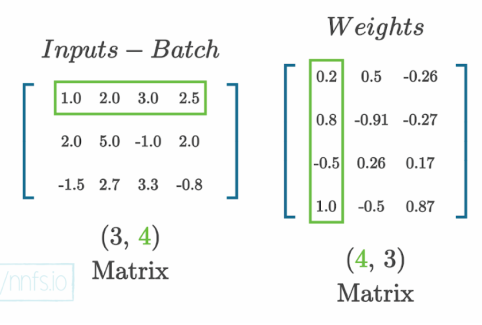

In [57]:
# 3 samples (each with 4 features) and 3 neurons with numpy

inputs= np.array([[1.0, 2.0, 3.0, 2.5], # features of sample 1
                  [2.0, 5.0, -1.0, 2.0], # features of sample 2
                  [-1.5, 2.7, 3.3, -0.8]]) # features of sample 3

weights= np.array([[0.2, 0.8, -0.5, 1.0], # weights of neuron 1
                   [0.5, -0.91, 0.26, -0.5], # weights of neuron 2
                   [-0.26, -0.27, 0.17, 0.87]]) # weights of neuron 3

biases= [2.0, # bias of neuron 1 
         3.0, # bias of neuron 2
         0.5] # bias of neuron 3

outputs= np.dot(inputs, weights.T) + biases
outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

Above code returns

- `[sample_1_neuron_1, sample_1_neuron_2, sample_1_neuron_3],`
- `[sample_2_neuron_1, sample_2_neuron_2, sample_2_neuron_3],`
- `[sample_3_neuron_1, sample_3_neuron_2, sample_3_neuron_3],`

Before, we were modeling neuron output using a single sample of data, a vector, but now we are
a step forward when we model layer behavior on a batch of data. We could retain the current
parameter order, but, as we’ll soon learn, it’s more useful to have a result consisting of a list of
layer outputs per each sample than a list of neurons and their outputs sample-wise. *We want the
resulting array to be sample-related and not neuron-related.*

In [47]:
sample_1= [1.0, 2.0, 3.0, 2.5] # a single sample
weights= np.array([[0.2, 0.8, -0.5, 1.0], # weights of neuron 1
                   [0.5, -0.91, 0.26, -0.5], # weights of neuron 2
                   [-0.26, -0.27, 0.17, 0.87]]) # weights of neuron 3

biases= [2.0, # bias of neuron 1 
         3.0, # bias of neuron 2
         0.5] # bias of neuron 3

np.dot(sample_1, weights.T) + biases

array([4.8  , 1.21 , 2.385])

Above is `[sample_1_neuron_1, sample_1_neuron_2, sample_1_neuron_3]`

In [51]:
sample_1_neuron_1= np.dot(sample_1, weights[0]) + biases[0]
sample_1_neuron_2= np.dot(sample_1, weights[1]) + biases[1]
sample_1_neuron_3= np.dot(sample_1, weights[2]) + biases[2]

sample_1_neuron_1, sample_1_neuron_2, sample_1_neuron_3

(4.8, 1.2099999999999997, 2.385)

In [55]:
sample_1_neuron_1= 1.0*0.2 + 2.0*0.8 + 3.0*-0.5 + 2.5*1.0 + 2.0
sample_1_neuron_1

4.8

Above is manual count of `[sample_1_neuron_1, sample_1_neuron_2, sample_1_neuron_3]`